# This is primarily for EDA or Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline

In [2]:
sns.set_style('whitegrid')
rcParams['figure.figsize'] = 10,7

In [9]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
# change age from days to years
df['age'] = round(df['age'] / 365, 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
df['age'].describe()

count    70000.000000
mean        53.339486
std          6.759534
min         29.600000
25%         48.400000
50%         54.000000
75%         58.400000
max         65.000000
Name: age, dtype: float64

Text(0.5,0,'Age')

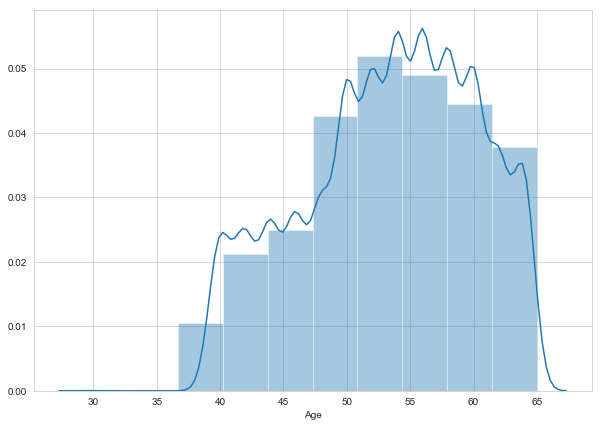

In [19]:
sns.distplot(df['age'], bins=10)
plt.xlabel('Age')

(array([4.0000e+00, 0.0000e+00, 2.5970e+03, 5.2720e+03, 6.1790e+03,
        1.0548e+04, 1.2872e+04, 1.2147e+04, 1.1023e+04, 9.3580e+03]),
 array([29.6 , 33.14, 36.68, 40.22, 43.76, 47.3 , 50.84, 54.38, 57.92,
        61.46, 65.  ]),
 <a list of 10 Patch objects>)

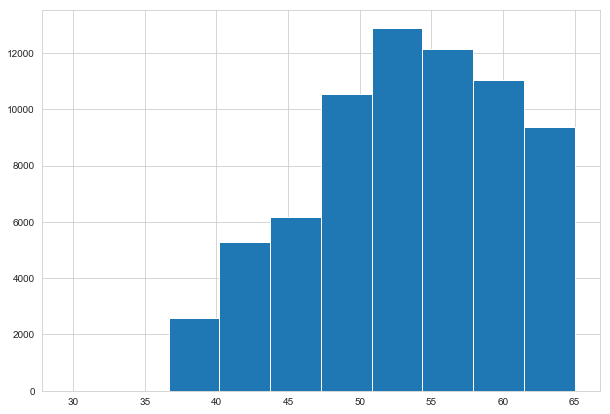

In [20]:
plt.hist(df['age'])

Text(0.5,0,'Age')

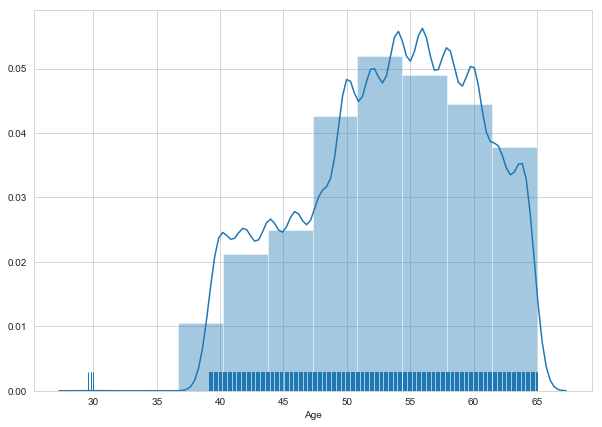

In [21]:
sns.distplot(df['age'], bins=10, rug=True)
plt.xlabel('Age')

{'whiskers': [<matplotlib.lines.Line2D at 0x1142a910>,
 'caps': [<matplotlib.lines.Line2D at 0x1142ae50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1142a670>],
 'medians': [<matplotlib.lines.Line2D at 0x11433410>],
 'fliers': [<matplotlib.lines.Line2D at 0x11433670>],
 'means': []}

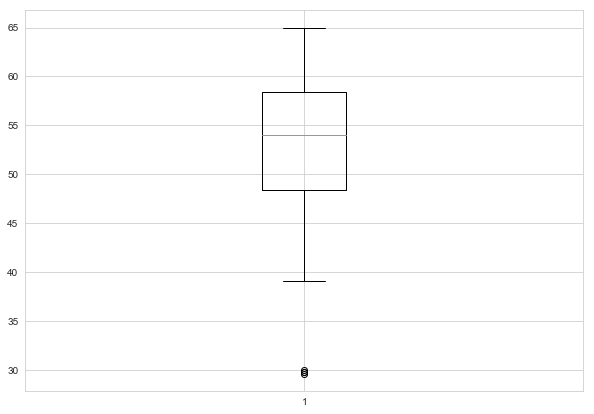

In [22]:
plt.boxplot(df['age'])

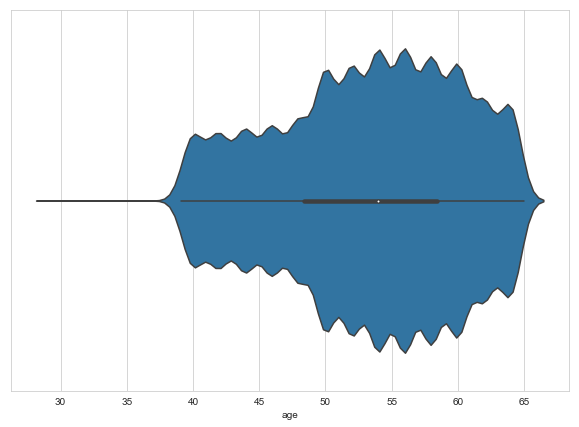

In [23]:
sns.violinplot(df['age'])

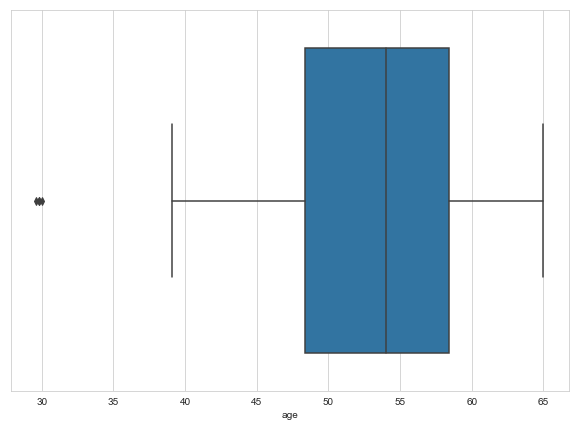

In [24]:
sns.boxplot(df['age'])

In [32]:
df[df['age'] < 39]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,8850,29.8,1,175,59.0,120,80,1,1,0,0,1,0
22343,31922,29.6,2,175,92.0,100,60,1,1,0,0,1,0
30666,43842,29.8,1,159,59.0,120,80,1,1,0,0,1,0
55905,79749,30.0,1,160,59.0,110,70,1,1,0,0,1,0


something already to consider here in this dataset is that there are 4 outliers of people below 30. although it isn't that huge of a section between 30 and 39. its just odd that there is a difference. I guess it just depends on the sample. Maybe its just the type of person to go to the doctor and test for all of these things.

I'm also going to take this opportunity to write down something about all of the columns. **gender is women=1 and men=2. height is in cm and weight is in kg, api: Sytolic blood pressure, ap_lo: Diastolic blood pressure, cholesterol: 1=normal, 2=above normal, and 3=well above normal, gluc is the same scale as cholesteral.** everything else is a binary feature.


force of blood ont eh walls of the artiers is called blood pressure. blood pressure is measured both as the heart contracts which is called sytole and when it relaxes which is called diastole. normal  is considered to be around 115 sytole and 70 diastole. or 115 over 70

In [33]:
115/70

1.6428571428571428

the idea ratio is around **1.6429**

In [34]:
140/90

1.5555555555555556

the ratio above is considered to be high blood pressure so i have to realize that its not the ratio, but rather just whether both numbers are high. so rather than a ratio it should be an aggregate

In [38]:
mylist = np.array([115, 70])
mylist.mean()

92.5

In [39]:
mylist = np.array([140, 90])
mylist.mean()

115.0

In [40]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0


high blood pressure = 140/90, normal is 120/80 and low is 90/60

In [41]:
# calculate mean arterial pressure
high = (140+90)/2
normal = (115+70)/2
low = (90+60)/2

print(high, normal, low)

115.0 92.5 75.0


In [46]:
df['mean arterial pressure'] = (df['ap_hi'] + df['ap_lo']) / 2

In [47]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,95.0
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,115.0
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,100.0
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,125.0
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,80.0


In [67]:
df['blood pressure'] = ''

In [69]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,95.0,
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,115.0,
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,100.0,
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,125.0,
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,80.0,


In [78]:
df_high = df[df['mean arterial pressure'] > high]

In [79]:
df_high['blood pressure'] = 2

c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
df_high.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,125.0,2
24,35,45.5,1,170,68.0,150,90,3,1,0,0,1,1,120.0,2
44,59,54.1,1,154,50.0,170,80,3,1,0,0,1,1,125.0,2
46,61,49.9,1,162,107.0,150,90,2,1,0,0,1,1,120.0,2
51,66,50.2,1,169,84.0,150,100,1,1,0,0,1,1,125.0,2


In [81]:
df_low = df[df['mean arterial pressure'] < low]

In [82]:
df_low.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
383,543,53.5,1,147,41.0,80,50,1,1,0,0,1,0,65.0,
567,815,58.3,1,168,78.0,14,90,2,1,0,0,1,1,52.0,
927,1294,59.9,2,175,70.0,14,90,3,1,0,0,1,1,52.0,
979,1360,49.9,1,172,65.0,11,80,1,3,0,0,1,0,45.5,
1600,2260,52.6,1,165,66.0,12,80,1,1,0,0,1,0,46.0,


In [83]:
df_low['blood pressure'] = 0

c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
df_low.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
383,543,53.5,1,147,41.0,80,50,1,1,0,0,1,0,65.0,0
567,815,58.3,1,168,78.0,14,90,2,1,0,0,1,1,52.0,0
927,1294,59.9,2,175,70.0,14,90,3,1,0,0,1,1,52.0,0
979,1360,49.9,1,172,65.0,11,80,1,3,0,0,1,0,45.5,0
1600,2260,52.6,1,165,66.0,12,80,1,1,0,0,1,0,46.0,0


In [88]:
df_normal = df[df['mean arterial pressure'] > low]

In [90]:
df_normal = df_normal[df_normal['mean arterial pressure'] < high ]

In [97]:
df_normal.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,95.0,
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,100.0,
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,80.0,
5,8,60.0,1,151,67.0,120,80,2,2,0,0,0,0,100.0,
6,9,60.6,1,157,93.0,130,80,3,1,0,0,1,0,105.0,


In [98]:
df_normal['blood pressure'] = 1

In [91]:
df_normal['mean arterial pressure'].mean()

99.15073706059849

In [92]:
normal

92.5

In [99]:
df_normal.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
count,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.000000,52031.0
mean,49960.342392,52.900813,1.342661,164.476293,72.666945,120.073668,78.227806,1.303262,1.203859,0.084911,0.050316,0.801657,0.394976,99.150737,1.0
std,28860.034027,6.806350,0.474604,8.085226,13.434734,9.260381,6.783346,0.633000,0.550412,0.278752,0.218599,0.398756,0.488850,6.730329,0.0
min,0.000000,29.600000,1.000000,55.000000,11.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,75.500000,1.0
25%,24984.000000,48.000000,1.000000,159.000000,64.000000,120.000000,79.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,95.000000,1.0
50%,49943.000000,53.700000,1.000000,165.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.0
75%,74908.500000,58.200000,2.000000,170.000000,80.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,100.000000,1.0
max,99999.000000,65.000000,2.000000,207.000000,200.000000,180.000000,170.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,114.500000,1.0


In [95]:
df_low.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.0
mean,48631.573248,51.719427,1.312102,162.831210,68.474522,43.035032,64.168790,1.251592,1.162420,0.070064,0.041401,0.754777,0.372611,53.601911,0.0
std,29266.160327,7.125536,0.464091,11.758221,14.132904,47.642056,26.168174,0.527591,0.475323,0.255662,0.199534,0.430906,0.484272,17.596538,0.0
min,543.000000,39.400000,1.000000,66.000000,37.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-35.000000,0.0
25%,23386.000000,45.600000,1.000000,157.250000,59.000000,12.000000,57.250000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,46.000000,0.0
50%,48594.000000,52.150000,1.000000,164.000000,68.000000,14.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,52.000000,0.0
75%,75190.750000,57.675000,2.000000,169.000000,77.000000,80.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,70.000000,0.0
max,99328.000000,64.800000,2.000000,190.000000,125.000000,149.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,74.500000,0.0


In [96]:
df_high.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
count,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.0
mean,50177.514432,55.068987,1.388278,164.158551,80.508737,171.220695,199.341155,1.564893,1.299725,0.101119,0.069409,0.812291,0.854113,185.280925,2.0
std,28742.903550,6.268482,0.487382,8.543371,16.369369,399.842256,481.049836,0.771078,0.623697,0.301501,0.254161,0.390498,0.353010,311.006205,0.0
min,3.000000,39.100000,1.000000,72.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,115.500000,2.0
25%,25471.750000,51.200000,1.000000,158.000000,69.000000,150.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,120.000000,2.0
50%,49928.500000,55.900000,1.000000,164.000000,79.000000,150.000000,100.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,125.000000,2.0
75%,75054.250000,60.000000,2.000000,170.000000,90.000000,160.000000,100.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,130.000000,2.0
max,99996.000000,64.900000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8050.000000,2.0


In [103]:
df_normal.join(df_high, lsuffix='id', rsuffix='blood pressure')

,idid,ageid,genderid,heightid,weightid,ap_hiid,ap_loid,cholesterolid,glucid,smokeid,...,ap_hiblood pressure,ap_loblood pressure,cholesterolblood pressure,glucblood pressure,smokeblood pressure,alcoblood pressure,activeblood pressure,cardioblood pressure,mean arterial pressureblood pressure,blood pressureblood pressure
0,0,50.4,2,168,62.0,110,80,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,51.7,1,165,64.0,130,70,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,47.9,1,156,56.0,100,60,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,60.0,1,151,67.0,120,80,2,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,60.6,1,157,93.0,130,80,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12,61.9,2,178,95.0,130,90,3,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13,48.4,1,158,71.0,110,70,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14,54.3,1,164,68.0,110,60,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,15,61.7,1,169,80.0,120,80,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,16,51.5,2,173,60.0,120,80,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,95.0,
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,115.0,
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,100.0,
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,125.0,
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,80.0,


In [105]:
df_low.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
383,543,53.5,1,147,41.0,80,50,1,1,0,0,1,0,65.0,0
567,815,58.3,1,168,78.0,14,90,2,1,0,0,1,1,52.0,0
927,1294,59.9,2,175,70.0,14,90,3,1,0,0,1,1,52.0,0
979,1360,49.9,1,172,65.0,11,80,1,3,0,0,1,0,45.5,0
1600,2260,52.6,1,165,66.0,12,80,1,1,0,0,1,0,46.0,0


In [106]:
df_normal.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,95.0,1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,100.0,1
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,80.0,1
5,8,60.0,1,151,67.0,120,80,2,2,0,0,0,0,100.0,1
6,9,60.6,1,157,93.0,130,80,3,1,0,0,1,0,105.0,1


In [107]:
df_high.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,125.0,2
24,35,45.5,1,170,68.0,150,90,3,1,0,0,1,1,120.0,2
44,59,54.1,1,154,50.0,170,80,3,1,0,0,1,1,125.0,2
46,61,49.9,1,162,107.0,150,90,2,1,0,0,1,1,120.0,2
51,66,50.2,1,169,84.0,150,100,1,1,0,0,1,1,125.0,2


In [108]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339486,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,112.723850
std,28851.302323,6.759534,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,122.653208
min,0.000000,29.600000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-35.000000
25%,25006.750000,48.400000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000
75%,74889.250000,58.400000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,110.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8050.000000


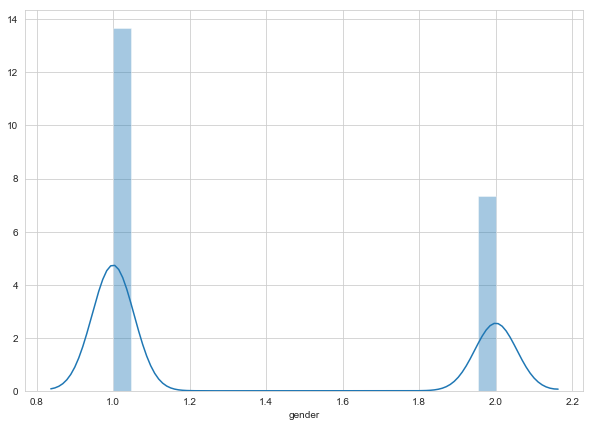

In [109]:
sns.distplot(df['gender'])

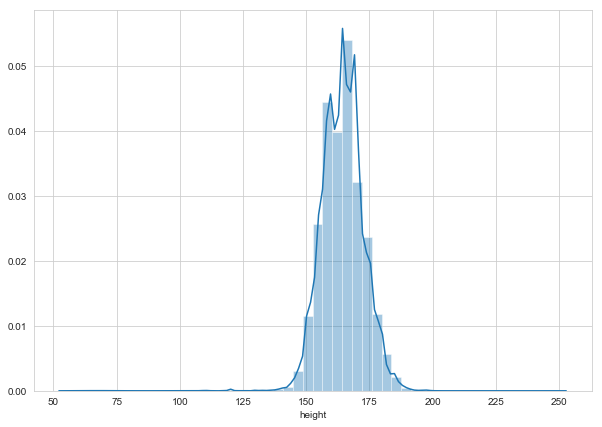

In [110]:
sns.distplot(df['height'])

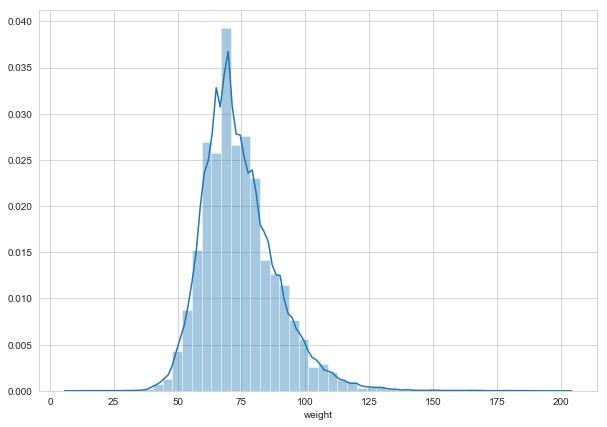

In [111]:
sns.distplot(df['weight'])

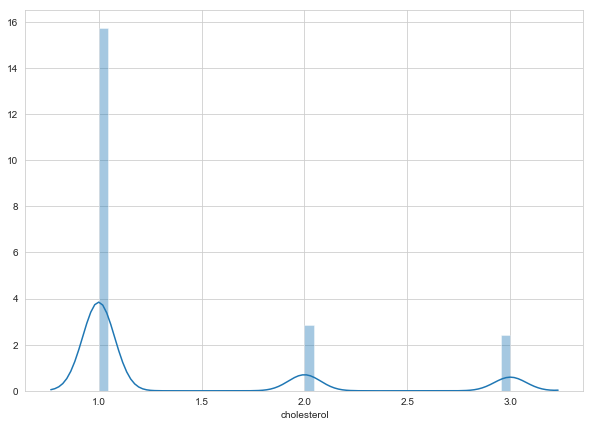

In [113]:
sns.distplot(df['cholesterol'])

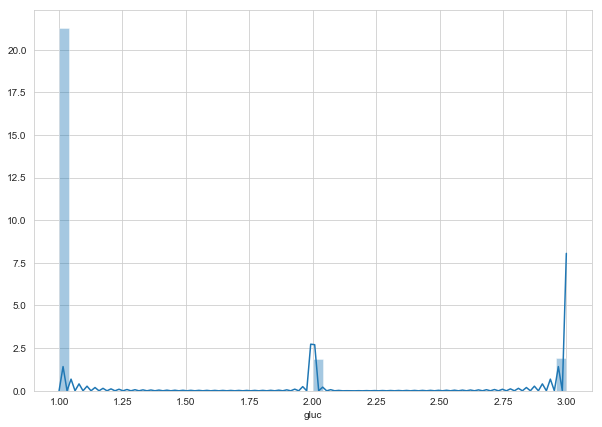

In [114]:
sns.distplot(df['gluc'])

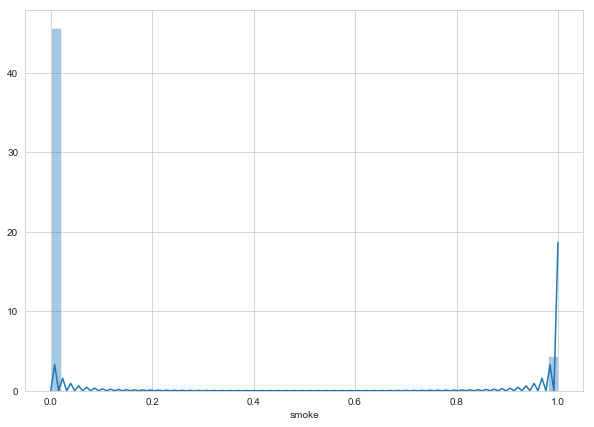

In [116]:
sns.distplot(df['smoke'])

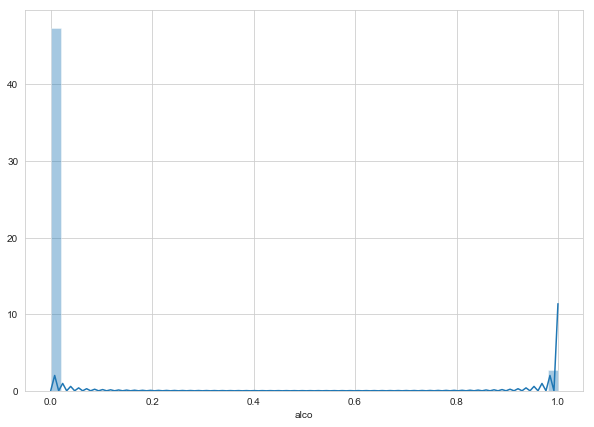

In [117]:
sns.distplot(df['alco'])

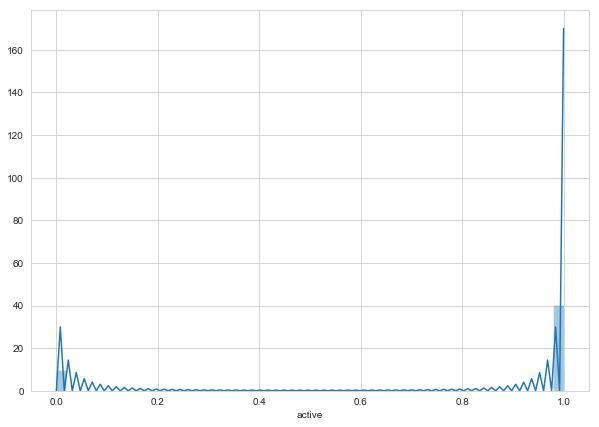

In [118]:
sns.distplot(df['active'])

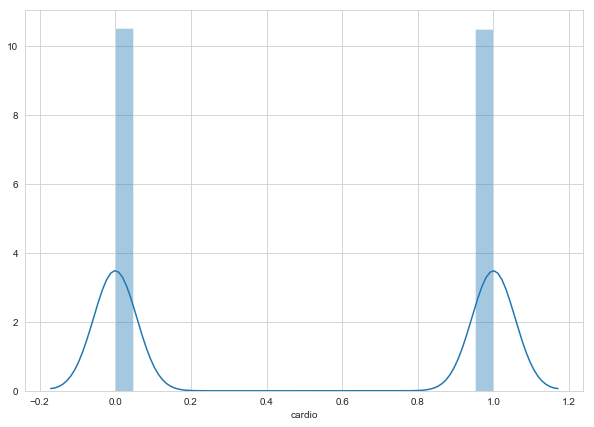

In [119]:
sns.distplot(df['cardio'])

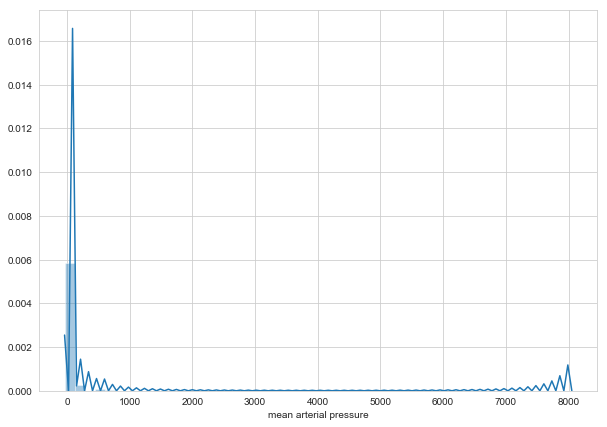

In [120]:
sns.distplot(df['mean arterial pressure'])

In [122]:
df['mean arterial pressure'].describe()

count    70000.000000
mean       112.723850
std        122.653208
min        -35.000000
25%        100.000000
50%        100.000000
75%        110.000000
max       8050.000000
Name: mean arterial pressure, dtype: float64

In [123]:
df[df['mean arterial pressure'] < 0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
4607,6525,41.9,1,165,78.0,-100,80,2,1,0,0,1,0,-10.0,
16021,22881,60.6,2,161,90.0,-115,70,1,1,0,0,1,0,-22.5,
20536,29313,42.7,1,153,54.0,-100,70,1,1,0,0,1,0,-15.0,
23988,34295,50.1,1,162,74.0,-140,90,1,1,0,0,1,1,-25.0,
25240,36025,40.3,2,168,50.0,-120,80,2,1,0,0,0,1,-20.0,
35040,50055,63.9,2,168,59.0,-150,80,1,1,0,0,1,1,-35.0,
46627,66571,64.8,2,160,59.0,-120,80,1,1,0,0,0,0,-20.0,
60106,85816,61.8,1,167,74.0,15,-70,1,1,0,0,1,1,-27.5,


not sure why there are negative blood pressure values here. maybe i can either replace them with the mean overall or remove them if they aren't that important

In [124]:
df[df['mean arterial pressure'] < 0].shape

(8, 15)

In [125]:
df.shape

(70000, 15)

not that much of a loss.

In [130]:
df_sample = df.loc[1:len(df)//3]

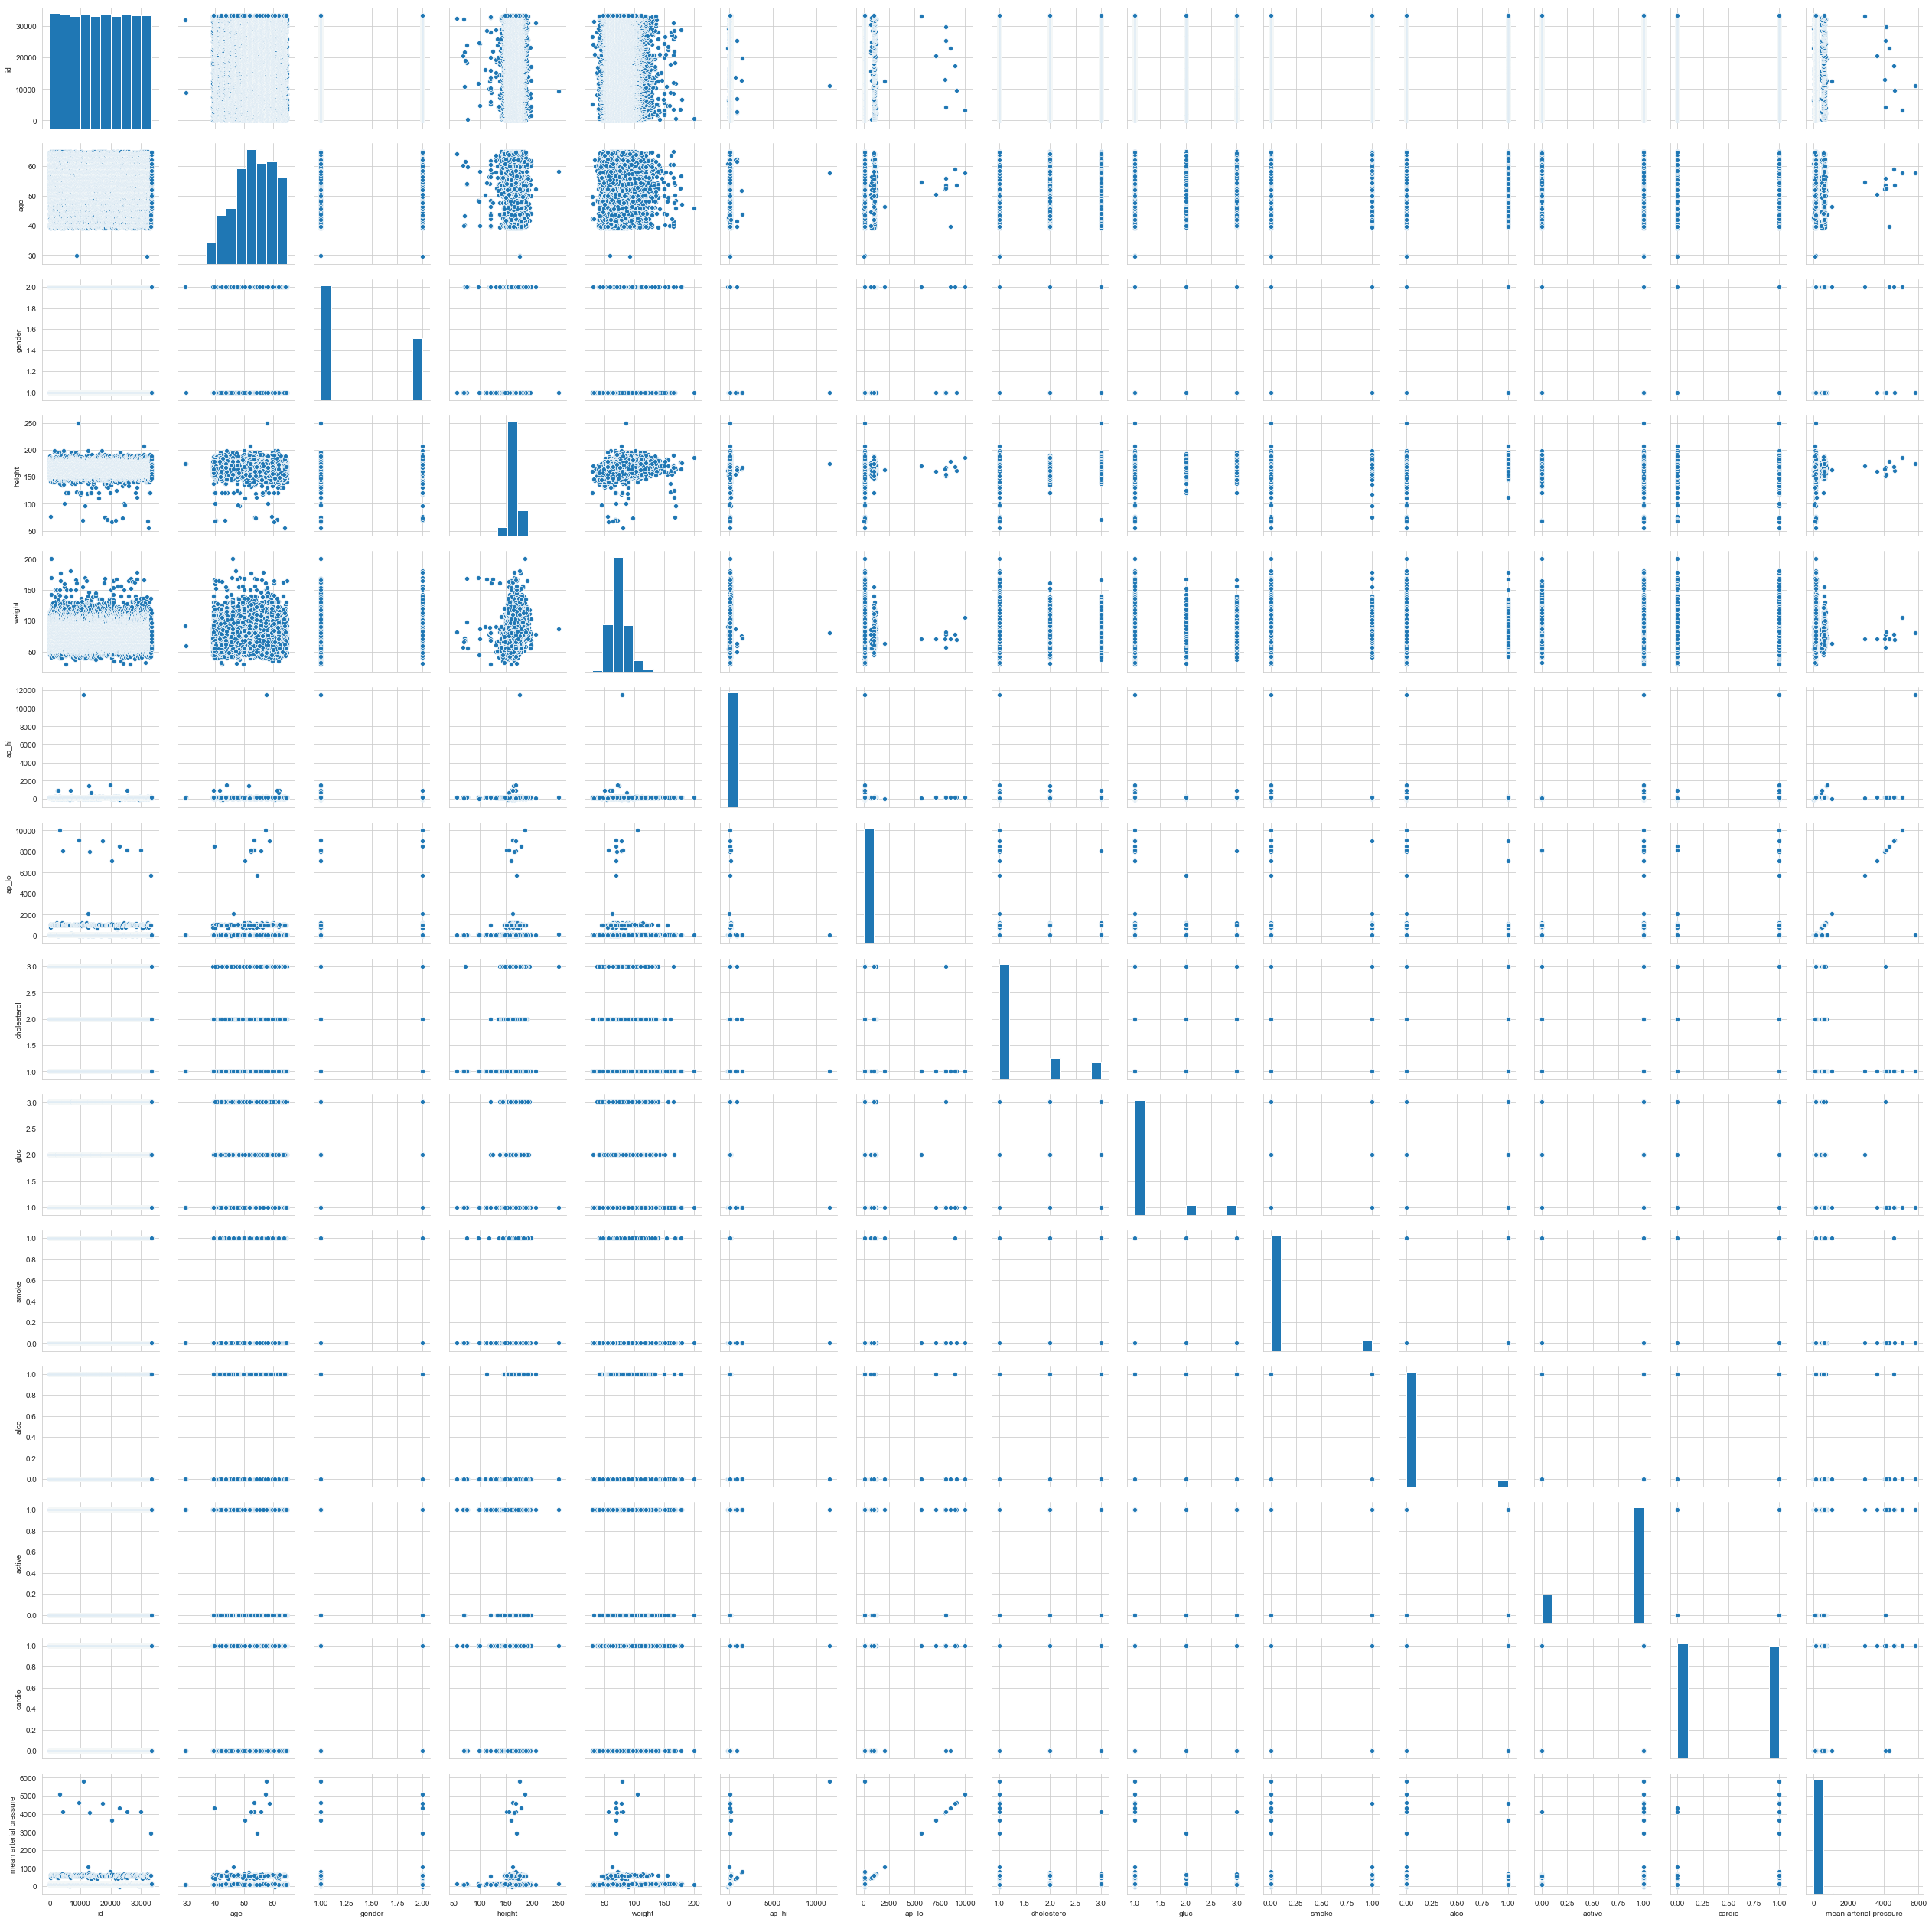

In [131]:
sns.pairplot(df_sample)

In [132]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,mean arterial pressure,blood pressure
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,95.0,
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,115.0,
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,100.0,
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,125.0,
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,80.0,


In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logreg = LogisticRegression()

X = df.drop(['cardio', 'blood pressure'], 1)
y = df['cardio']

logreg.fit(X, y)
logreg.score(X, y)

c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7213571428571428

In [136]:
from sklearn.feature_selection import SelectKBest

In [153]:
X_new = SelectKBest(k=10).fit_transform(X, y)


In [154]:
X.shape

(70000, 13)

In [155]:
X_new.shape

(70000, 10)

In [156]:
type(X_new)

numpy.ndarray

In [157]:
print(X_new)

[[ 50.4 168.   62.  ...   0.    1.   95. ]
 [ 55.4 156.   85.  ...   0.    1.  115. ]
 [ 51.7 165.   64.  ...   0.    0.  100. ]
 ...
 [ 52.2 183.  105.  ...   0.    0.  135. ]
 [ 61.5 163.   72.  ...   0.    0.  107.5]
 [ 56.3 170.   72.  ...   0.    1.  100. ]]


In [158]:
df2 = pd.DataFrame(X_new)

In [163]:
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,50.4,168.0,62.0,110.0,80.0,1.0,1.0,0.0,1.0,95.0
1,55.4,156.0,85.0,140.0,90.0,3.0,1.0,0.0,1.0,115.0
2,51.7,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,100.0
3,48.3,169.0,82.0,150.0,100.0,1.0,1.0,0.0,1.0,125.0
4,47.9,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,80.0


In [160]:
logreg.fit(X_new, y)
logreg.score(X_new, y)

c:\users\gebruiker\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7209